In [204]:
from sklearn.model_selection import train_test_split, cross_val_score #test regression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn


In [4]:
from sklearn.linear_model import LogisticRegression

In [176]:
data = pd.read_csv('Telco-Customer-Churn.csv')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Data:

- CustomerID
- Gender
- Age 
- Senior Citizen Yes, No
- Married (Partner) Yes, No
- Dependents Yes, No. Dependents could be children, parents, grandparents, etc.
- Number of Dependents
- Phone Service: Yes, No
- Multiple Lines: Yes, No
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Yes, No
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- Premium Tech Support: Yes, No
- Streaming TV: Yes, No
- Streaming Movies: Yes, No
- Contract:  Month-to-Month, One Year, Two Year.
- Paperless Billing:  Yes, No
- Payment Method: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Tenure: Indicates the total amount of months that the customer has been with the company.
- Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [263]:
df = data.dropna()

In [264]:
df = data.drop(['customerID','Churn', 'MonthlyCharges', 'TotalCharges', 'MultipleLines', 'tenure'], axis = 1)

In [265]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check


## План:
- разделим категориальные данные и колич *проверить на мультиколлинераность и убрать лишние
- промасштабрируем признаки через standarscaler
- посчитать для 1 категориальных 
- стандиртизировать все колич данные
- пересчитать лог.регрессию посмотреть на recall precision
- кроссвалидация 
- roc auc


In [282]:
df = df.replace({'Yes': 1, 'No':0, 'Female': 0, 'Male':1, '1': 1, '0': 0, 'No internet service': 0}) #все номинальные признаки это Да или Нет, проще просто заменить их на 0 1 # LabelEncoder(),OneHorRecoder  в помощь если больше вариаций


In [283]:
contract = pd.get_dummies(df['Contract'], drop_first = True)
paymethod = pd.get_dummies(df['PaymentMethod'], drop_first = True)
int_service = pd.get_dummies(df['InternetService'], drop_first = True)#номинальные в бинарные 


In [284]:
df_binonly = df.drop(['InternetService', 'Contract', 'PaymentMethod'], axis = 1)
df_binonly #первая таблица для лог регрессии, где только фичи по да-нет

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,1,0,1,0,0,0,0
2,1,0,0,0,1,1,1,0,0,0,0,1
3,1,0,0,0,0,1,0,1,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,1,1,1,1,1
7039,0,0,1,1,1,0,1,1,0,1,1,1
7040,0,0,1,1,0,1,0,0,0,0,0,1
7041,1,1,1,0,1,0,0,0,0,0,0,1


In [330]:
df_plus_dummies = pd.concat([df_binonly, contract, paymethod, int_service], axis=1) 
df_plus_dummies #добавим остальные признаки, теперь остались лишь количественные признаки в колонках ['MonthlyCharges', 'TotalCharges', 'tenure'] # TotalCharges имеет тип объект, надо сделать float!!!

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,One year,Two year,Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0
3,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,0
7039,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,1
7040,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
7041,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [471]:
# totalcharges
try:
    data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
except Exception as e:
    print(e)

In [270]:
# totalcharges
print(data[data['TotalCharges'] == ' '].index) #там были спрятаны пустые значения, их нужно преобразовать иначе вся колонка слетит и не преобразуется во float (cделаем их медианой)

Int64Index([], dtype='int64')


In [271]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)#nans

In [272]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [273]:
#Multicollinearity 
numerical_param = ['tenure', 'MonthlyCharges','TotalCharges']
data[numerical_param].corr() 

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


In [ ]:
Продолжительность использования сильно коррелирует со стомостью, что в приципе ясно, поэтому избавимся от одного параметра и нормализуем данные

In [ ]:
#используем >>> StandardScaler приведем данные в одну размерность и преобразуем последний массив 

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>]], dtype=object)

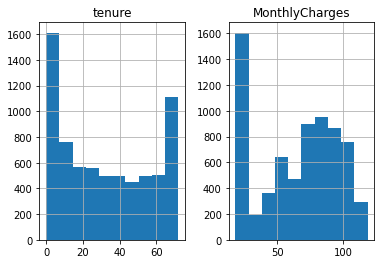

In [198]:
data[['tenure', 'MonthlyCharges']].hist()

In [209]:
scaler = StandardScaler()
scaler.fit(data[['tenure']])
tenure1 = scaler.transform(data[['tenure']])

In [218]:
scaler.fit(data[['MonthlyCharges']])
month_pay = scaler.transform(data[['MonthlyCharges']])

In [388]:
full_features = pd.DataFrame(index=df_plus_dummies.index)
full_features['tenure'] = tenure1 
full_features['month_pay'] = month_pay
last_full_data = pd.concat([df_plus_dummies, full_features], axis=1) 

In [381]:
last_full_data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,month_pay
0,0,0,1,0,0,0,1,0,0,0,0,1,-1.277445,-1.160323
1,1,0,0,0,1,1,0,1,0,0,0,0,0.066327,-0.259629
2,1,0,0,0,1,1,1,0,0,0,0,1,-1.236724,-0.362660
3,1,0,0,0,0,1,0,1,1,0,0,0,0.514251,-0.746535
4,0,0,0,0,1,0,0,0,0,0,0,1,-1.236724,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,1,1,1,1,1,-0.340876,0.665992
7039,0,0,1,1,1,0,1,1,0,1,1,1,1.613701,1.277533
7040,0,0,1,1,0,1,0,0,0,0,0,1,-0.870241,-1.168632
7041,1,1,1,0,1,0,0,0,0,0,0,1,-1.155283,0.320338


In [297]:
Y = data['Churn'].replace({'Yes': 1, 'No':0})

In [317]:
# logisticalReg df_binonly
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_binonly, Y, test_size=0.20, random_state=3)

In [462]:
class1 = LogisticRegression(solver='lbfgs',random_state=34)

In [463]:
class1.fit(X_train1, y_train1)

LogisticRegression(random_state=34)

In [464]:
y_pred1 = class1.predict(X_test1)

In [465]:
print(np.mean(cross_val_score(class1, X_train1, y_train1, cv = 10))) 
print(np.mean(cross_val_score(class1, X_test1, y_test1, cv= 10))) 

0.7511494904450575
0.7750253292806485


In [466]:
print(cross_val_score(class1, X_train1, y_train1, cv = 4)) # по кросс валидации данные опр. в точности до 76 процентов
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, plot_roc_curve
print('precision: ', precision_score(y_test1, y_pred1))
print('recall: ', recall_score(y_test1, y_pred1))
print(f'accuracy: {round(accuracy_score(y_test1, y_pred1)*100, 1)}%') 

[0.76224273 0.75727466 0.73934659 0.74715909]
precision:  0.7372881355932204
recall:  0.2396694214876033
accuracy: 78.2%


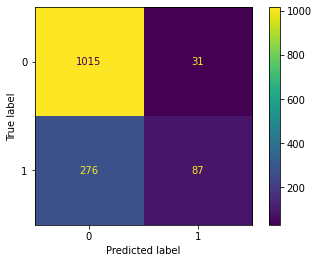

In [467]:
#Первая версия данных показывает очень низкий реколл.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(class1, X_test1, y_test1)
plt.show() #TN,FP,FN,TP 


In [468]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1046
           1       0.74      0.24      0.36       363

    accuracy                           0.78      1409
   macro avg       0.76      0.61      0.62      1409
weighted avg       0.77      0.78      0.74      1409



In [364]:
#данные с доп.параметрами категориальными. df_plus_dummies
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_plus_dummies, Y, test_size=0.20, random_state=13)

In [365]:
class2 = LogisticRegression(solver='lbfgs',random_state=2)
class2.fit(X_train2, y_train2)

LogisticRegression(random_state=2)

In [366]:
y_pred2 = class2.predict(X_test2)

In [367]:
print(np.mean(cross_val_score(class2, X_train2, y_train2, cv = 10))) 
print(np.mean(cross_val_score(class2, X_test2, y_test2, cv= 10))) 

0.7841653754582215
0.7941742654508612


In [370]:
print('precision: ', precision_score(y_test2, y_pred2))
print('recall: ', recall_score(y_test2, y_pred2))
print(f'accuracy: {round(accuracy_score(y_test2, y_pred2)*100, 1)}%') 

precision:  0.6237942122186495
recall:  0.5373961218836565
accuracy: 79.8%


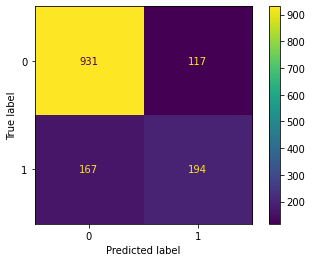

In [371]:
#подрос рекосс - упал пресижен
plot_confusion_matrix(class2, X_test2, y_test2)
plt.show() #TN,FP,FN,TP стало заметно больше FP 


In [420]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1048
           1       0.62      0.54      0.58       361

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [447]:
#последние данные last_full_data
X_train, X_test, y_train, y_test = train_test_split(last_full_data, Y, test_size=0.20, random_state=2)

In [448]:
classification = LogisticRegression(random_state=233) 
classification.fit(X_train, y_train)

LogisticRegression(random_state=233)

In [449]:
y_pred = classification.predict(X_test)

In [450]:
y_predproba = classification.predict_proba(X_test)

In [451]:
y_predproba

array([[0.74591526, 0.25408474],
       [0.74872928, 0.25127072],
       [0.97527903, 0.02472097],
       ...,
       [0.8454897 , 0.1545103 ],
       [0.89377644, 0.10622356],
       [0.66451681, 0.33548319]])

In [452]:
print(np.mean(cross_val_score(classification, X_train, y_train, cv = 10))) 
print(np.mean(cross_val_score(classification, X_test, y_test, cv= 10))) 

0.7985516420392276
0.8041438703140831


In [453]:
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print(f'accuracy: {round(accuracy_score(y_test, y_pred)*100, 1)}%') 

precision:  0.6395759717314488
recall:  0.5201149425287356
accuracy: 80.9%


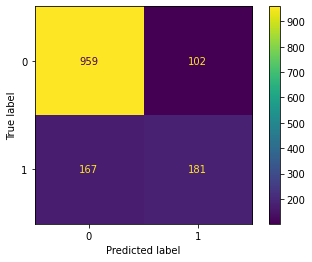

In [454]:
#тут пока наилучший баланс
plot_confusion_matrix(classification, X_test, y_test)
plt.show() #TN,FP,FN,TP стало заметно больше F


In [437]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1034
           1       0.53      0.81      0.64       375

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [422]:
#посмотрим на roc кривую в последнем тесте

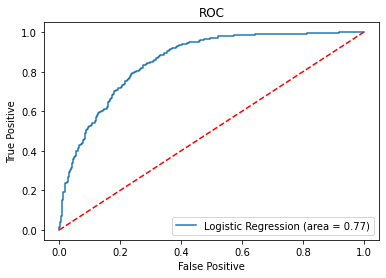

In [438]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, classification.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classification.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend()
plt.show()